In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/HR-Analytics-Project--Understanding-the-Attrition-in-HR/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:

df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

<Axes: xlabel='Age', ylabel='Count'>

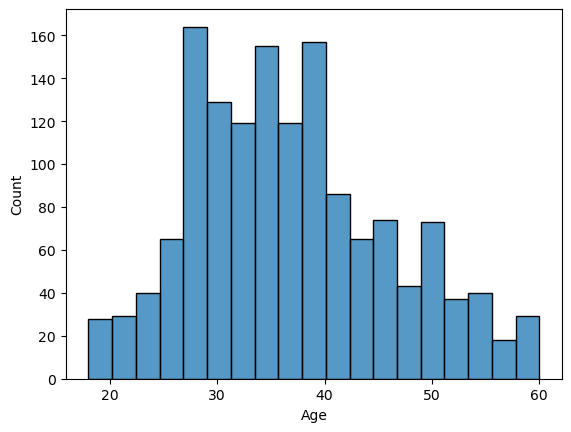

In [10]:
sns.histplot(df['Age'])

<Axes: xlabel='Attrition', ylabel='Age'>

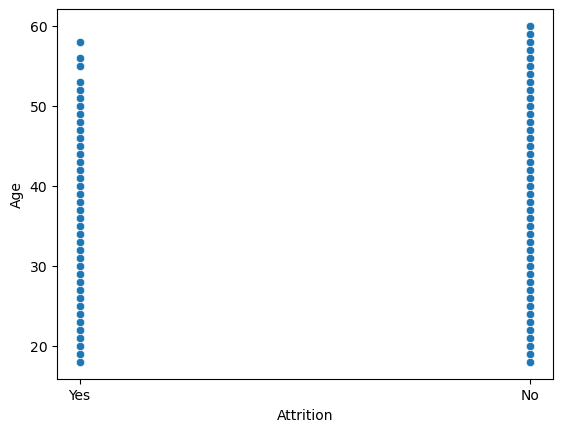

In [11]:
sns.scatterplot(x='Attrition',y='Age', data=df)

<Axes: xlabel='Age', ylabel='Attrition'>

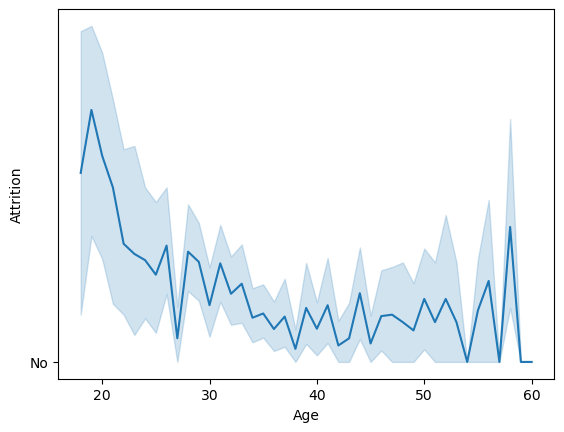

In [12]:
sns.lineplot(x='Age',y='Attrition',data=df)

<Axes: >

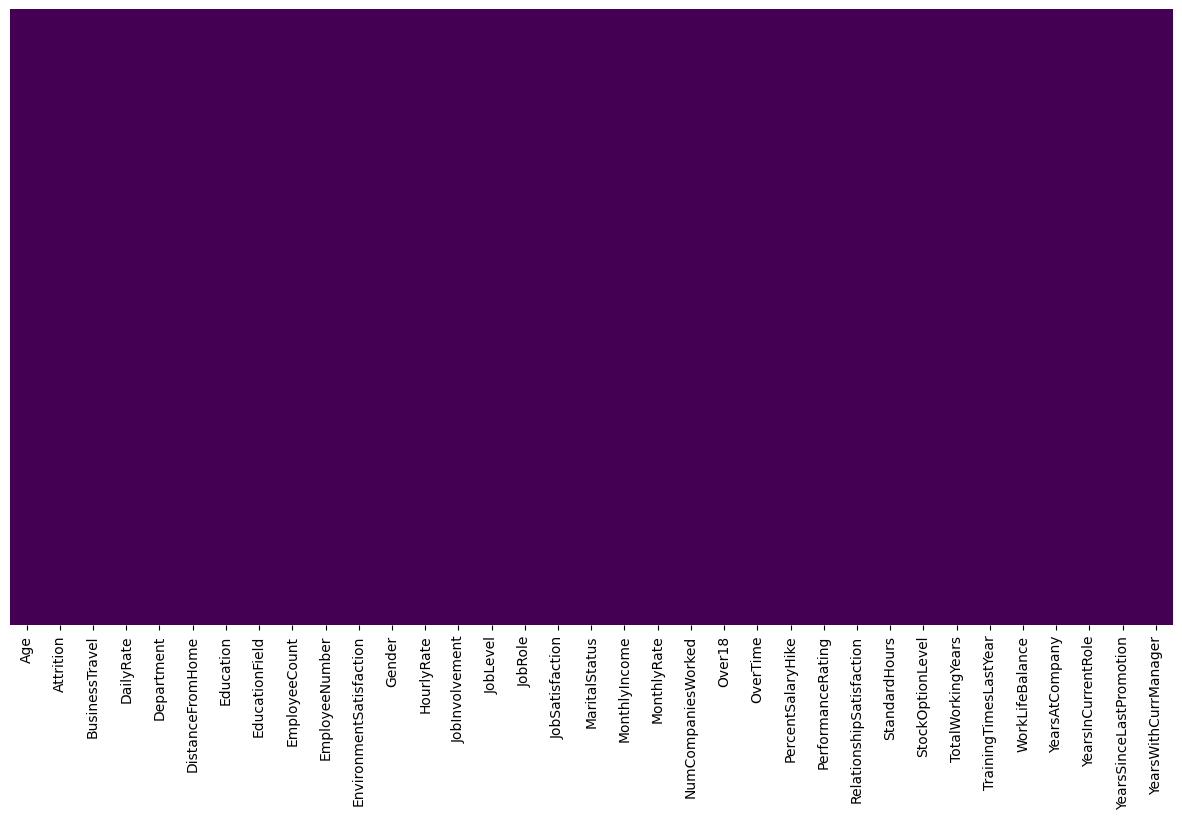

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

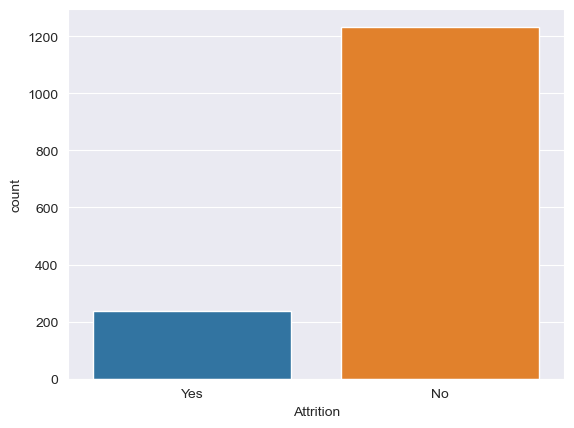

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Attrition', data=df)

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x22612fb5190>,
 [Text(-1.0930587195656423, 0.606401381579494, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6558352317393852, 0.3638408289476963, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

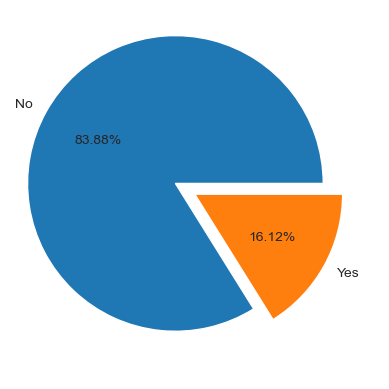

In [16]:
plt.pie(df['Attrition'].value_counts().values,labels=df['Attrition'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

<Axes: xlabel='Attrition', ylabel='BusinessTravel'>

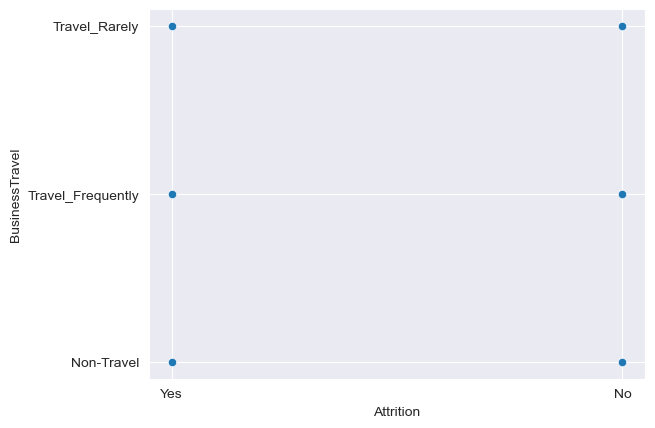

In [19]:
sns.scatterplot(x='Attrition',y='BusinessTravel', data=df)

In [20]:
df.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

In [21]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

([<matplotlib.patches.Wedge at 0x22612f8d410>,
 [Text(-0.6728966948858769, 0.8701781645224518, 'Travel_Rarely'),
  Text(0.36441614894376395, -1.037882878936249, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.3466191001671471, 'Non-Travel')],
 [Text(-0.36703456084684194, 0.4746426351940646, '70.95%'),
  Text(0.19877244487841667, -0.5661179339652267, '18.84%'),
  Text(0.5694334372784109, -0.18906496372753476, '10.20%')])

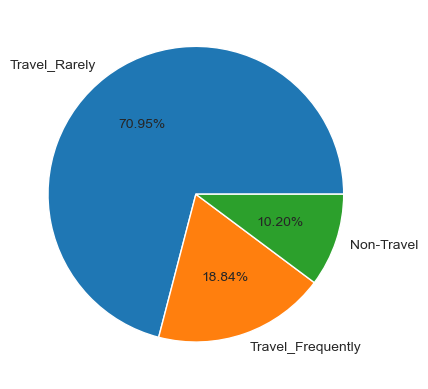

In [22]:
plt.pie(df['BusinessTravel'].value_counts().values,labels=df['BusinessTravel'].value_counts().index,autopct='%1.2f%%')

<Axes: xlabel='DailyRate', ylabel='Density'>

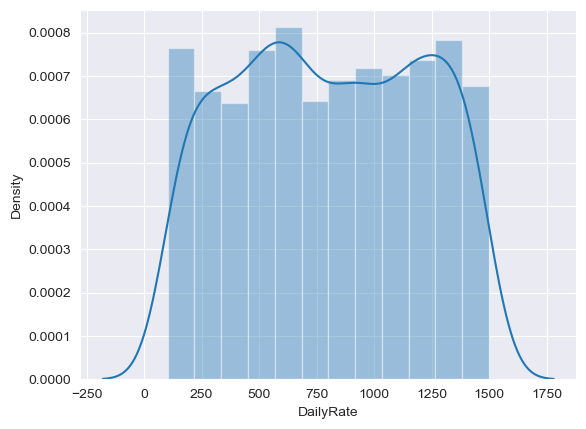

In [23]:
sns.distplot(df['DailyRate'])

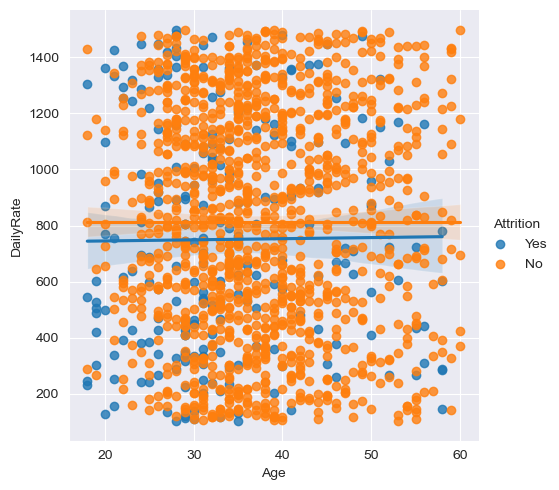

In [24]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

In [25]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [26]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Attrition'>

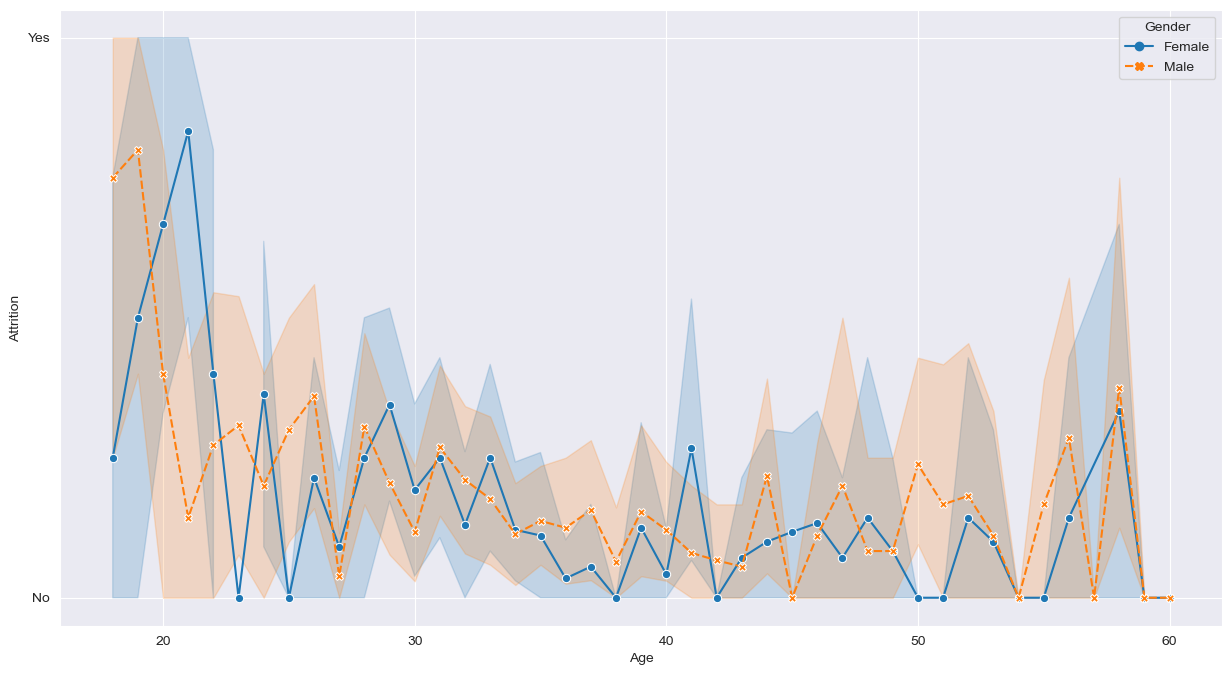

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age',y='Attrition',hue='Gender',style='Gender',markers=True,data=df)

<Axes: xlabel='Gender', ylabel='DailyRate'>

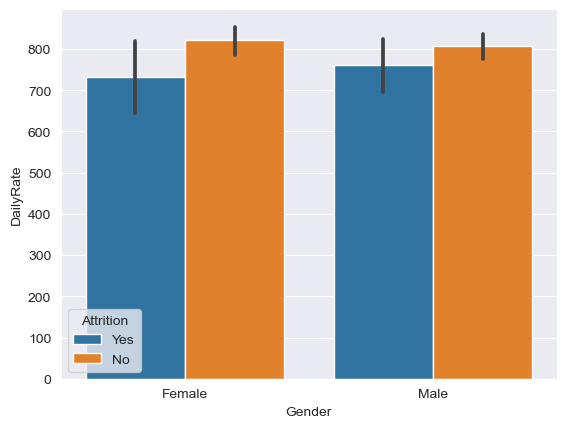

In [29]:
sns.barplot(y='DailyRate',x='Gender',hue='Attrition', data=df)

In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [32]:
df.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

<Axes: xlabel='Department', ylabel='count'>

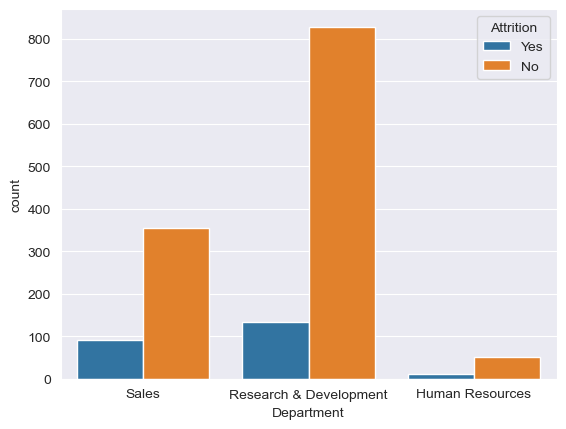

In [33]:
sns.countplot(x='Department',hue='Attrition',data=df)

<Axes: xlabel='Department', ylabel='DailyRate'>

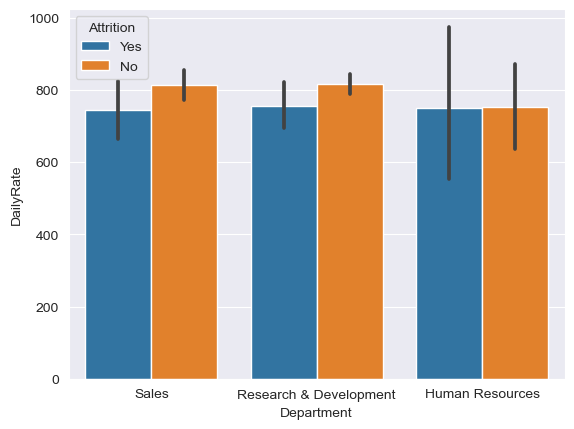

In [34]:
sns.barplot(x='Department',y='DailyRate',hue='Attrition', data=df)

In [35]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

([<matplotlib.patches.Wedge at 0x22614477150>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.37548555701288383, -1.0339296864268501, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37%'),
  Text(0.20481030382520934, -0.5639616471419181, '30.34%'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29%')])

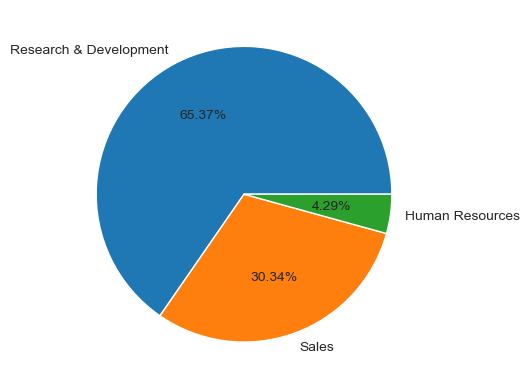

In [36]:
plt.pie(df['Department'].value_counts().values,labels=df['Department'].value_counts().index,autopct='%1.2f%%')

In [37]:
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

<Axes: xlabel='Age', ylabel='DistanceFromHome'>

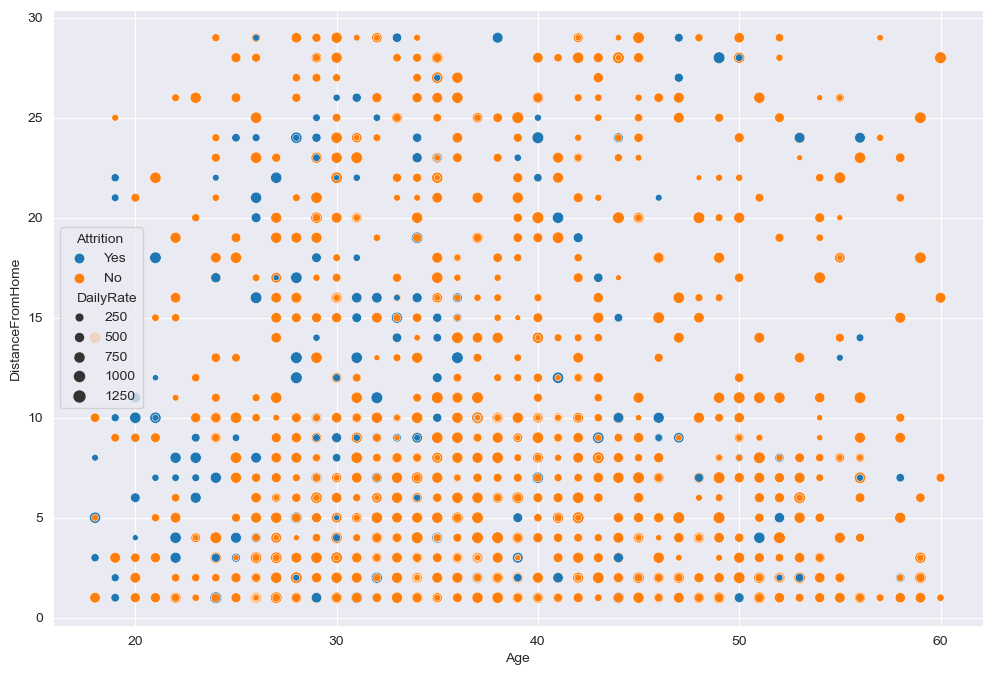

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='DistanceFromHome',hue='Attrition', size='DailyRate', data=df)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

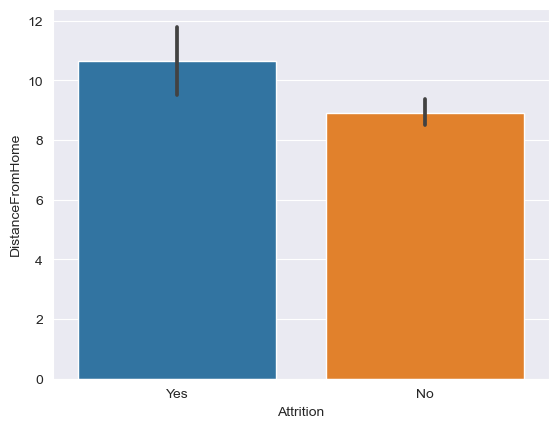

In [39]:
sns.barplot(x='Attrition',y='DistanceFromHome', data=df)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

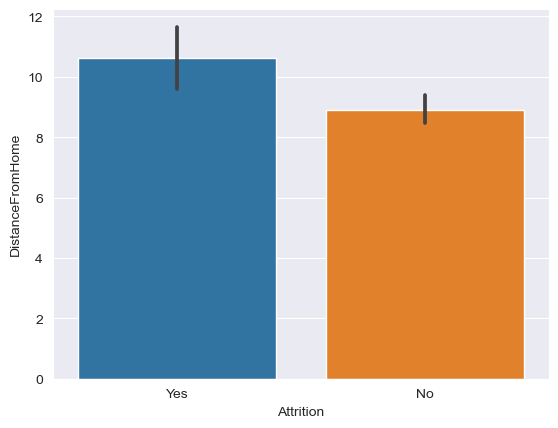

In [40]:
sns.barplot(x='Attrition',y='DistanceFromHome', data=df)

<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

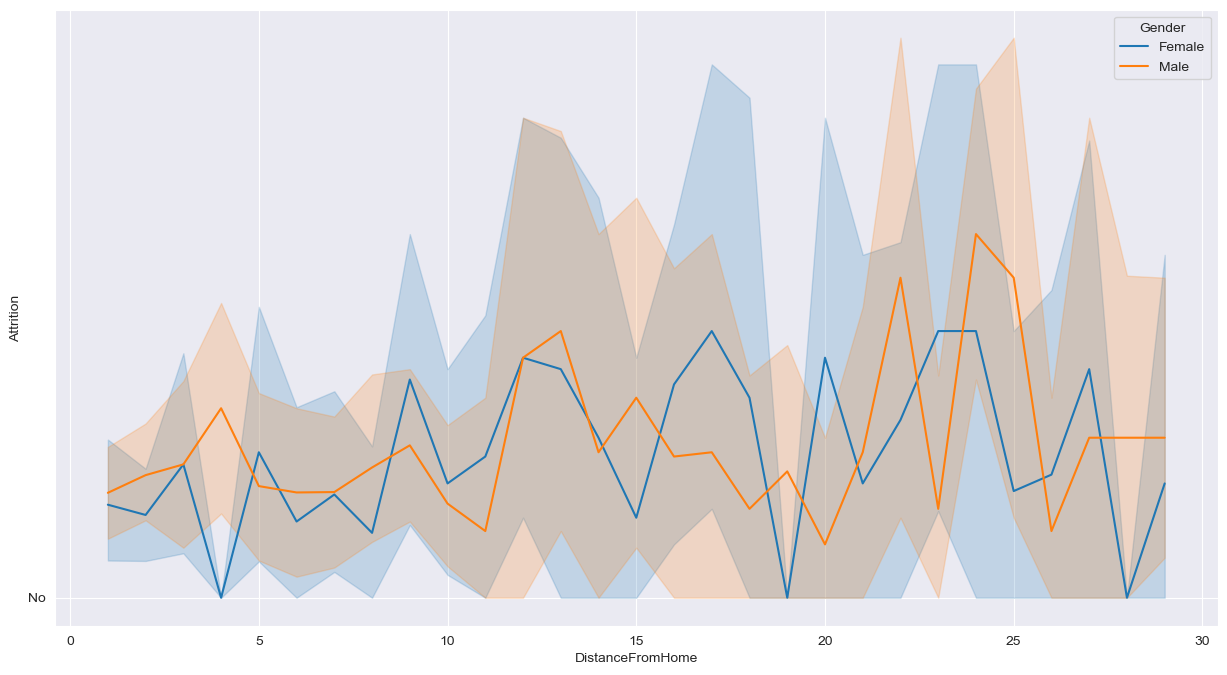

In [41]:
plt.figure(figsize=(15,8))
sns.lineplot(x='DistanceFromHome',y='Attrition',hue='Gender',markers=True,data=df)

In [42]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [43]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [44]:
df.groupby('Education')['Attrition'].value_counts()

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

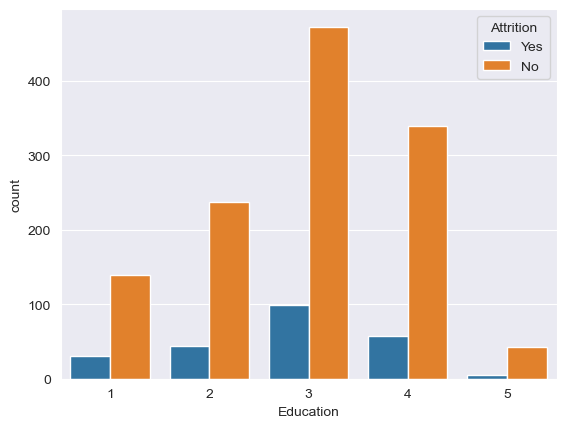

In [45]:
sns.countplot(x='Education',hue='Attrition', data=df)

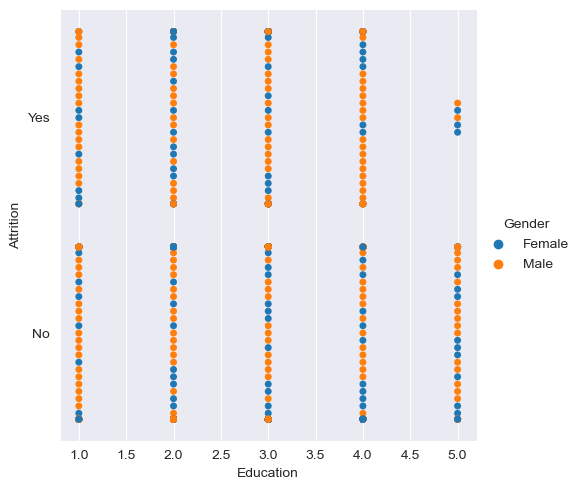

In [46]:
sns.catplot(x="Education", y="Attrition", hue="Gender", kind="swarm", data=df)

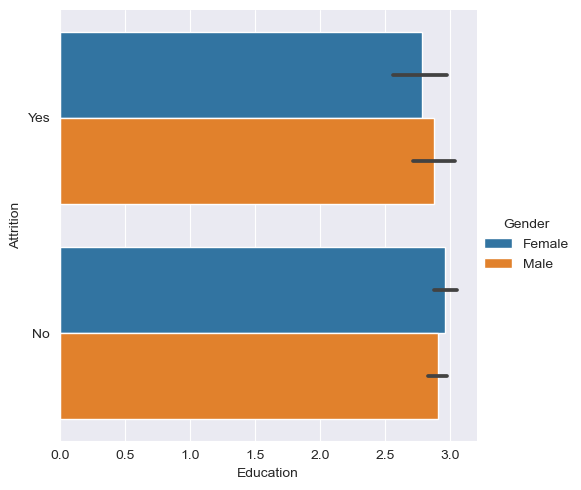

In [47]:
sns.catplot(x="Education", y="Attrition", hue="Gender", kind="bar", data=df)

In [48]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [49]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [50]:
df.groupby('Education')['EducationField'].value_counts()

Education  EducationField  
1          Life Sciences        67
           Medical              63
           Technical Degree     19
           Marketing            14
           Other                 5
           Human Resources       2
2          Life Sciences       116
           Medical              99
           Marketing            24
           Technical Degree     22
           Other                19
           Human Resources       2
3          Life Sciences       233
           Medical             183
           Marketing            59
           Technical Degree     57
           Other                24
           Human Resources      16
4          Life Sciences       173
           Medical             104
           Marketing            52
           Other                33
           Technical Degree     31
           Human Resources       5
5          Life Sciences        17
           Medical              15
           Marketing            10
           Technical Degree

In [52]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [54]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

<Axes: ylabel='count'>

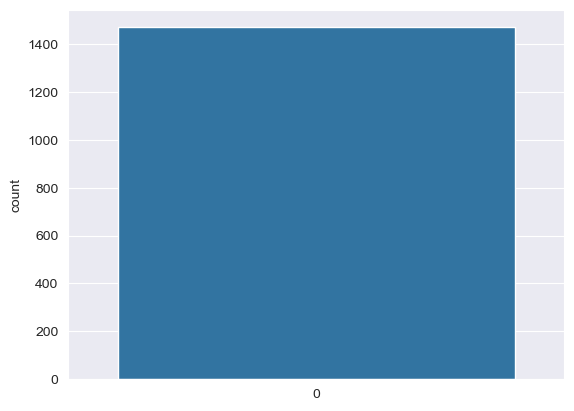

In [55]:
sns.countplot(df['EmployeeCount'])

In [56]:
df['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [57]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

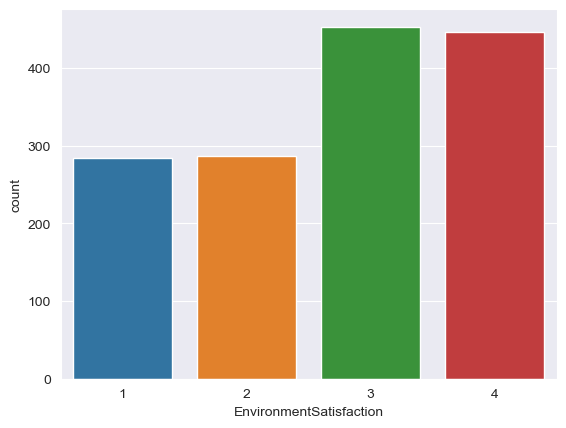

In [58]:
sns.countplot(x='EnvironmentSatisfaction', data=df)


<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

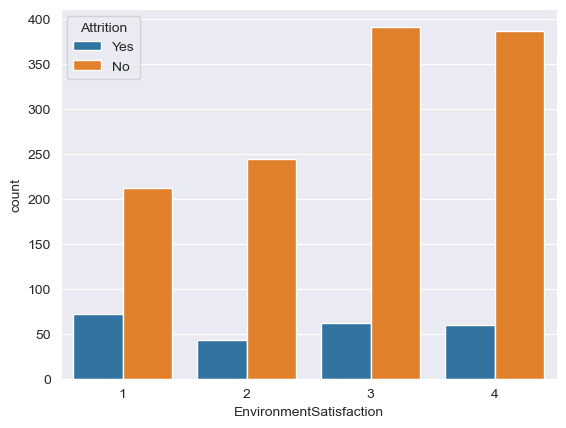

In [59]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition',data=df)

In [60]:
df['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

<Axes: xlabel='HourlyRate', ylabel='Density'>

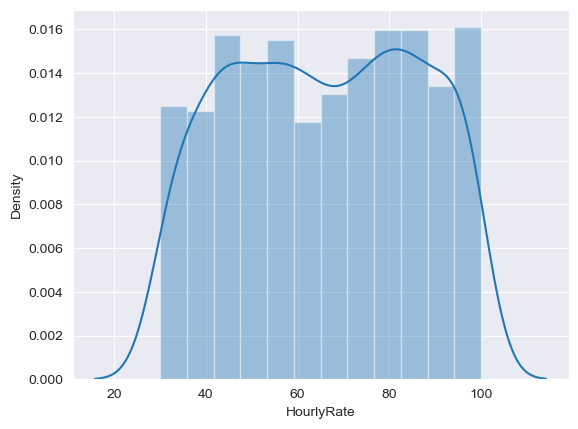

In [61]:
sns.distplot(df['HourlyRate'])

<Axes: xlabel='HourlyRate', ylabel='Attrition'>

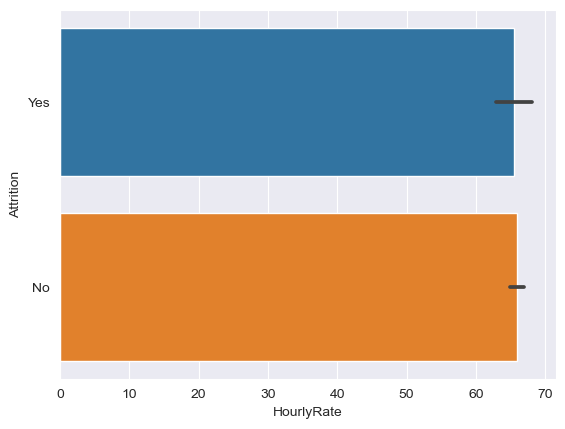

In [62]:
sns.barplot(x='HourlyRate', y='Attrition', data=df)

In [63]:
df.groupby('Gender')['DailyRate'].mean()

Gender
Female    808.273810
Male      798.626984
Name: DailyRate, dtype: float64

In [64]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [65]:
#job involvement
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [66]:
df.groupby('JobInvolvement')['JobInvolvement'].value_counts()

JobInvolvement  JobInvolvement
1               1                  83
2               2                 375
3               3                 868
4               4                 144
Name: JobInvolvement, dtype: int64

<Axes: xlabel='JobInvolvement', ylabel='count'>

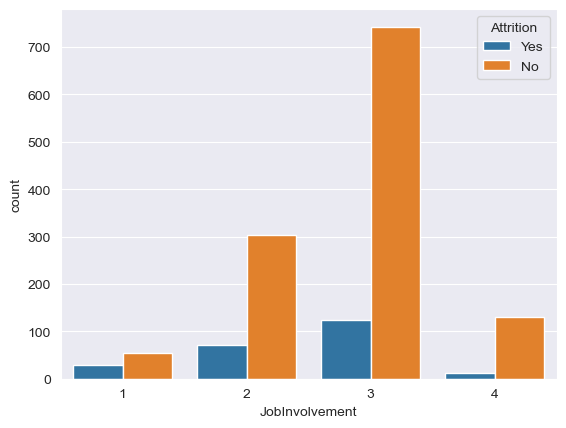

In [67]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

In [68]:
#job level
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<Axes: ylabel='count'>

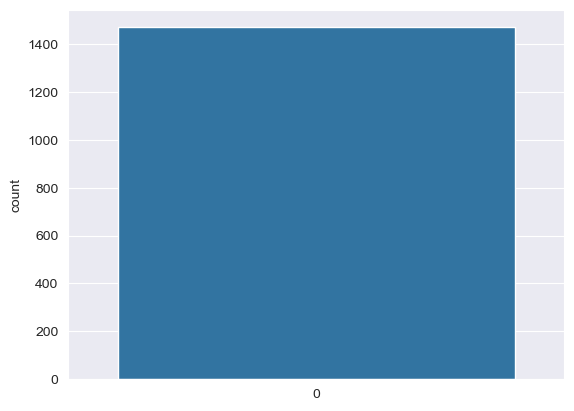

In [69]:
sns.countplot(df['JobLevel'])

<Axes: xlabel='JobLevel', ylabel='count'>

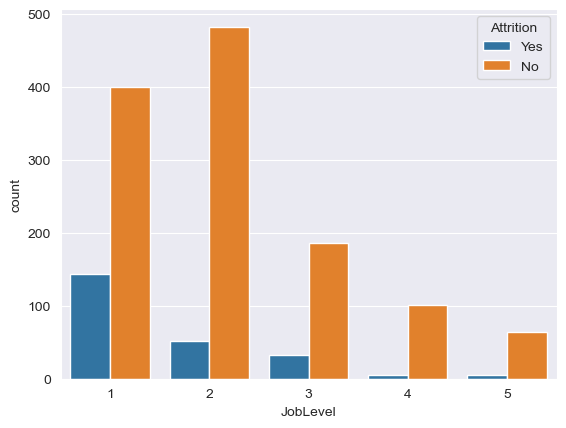

In [70]:
sns.countplot(x='JobLevel', hue='Attrition', data=df)

In [71]:
#job Role
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [72]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

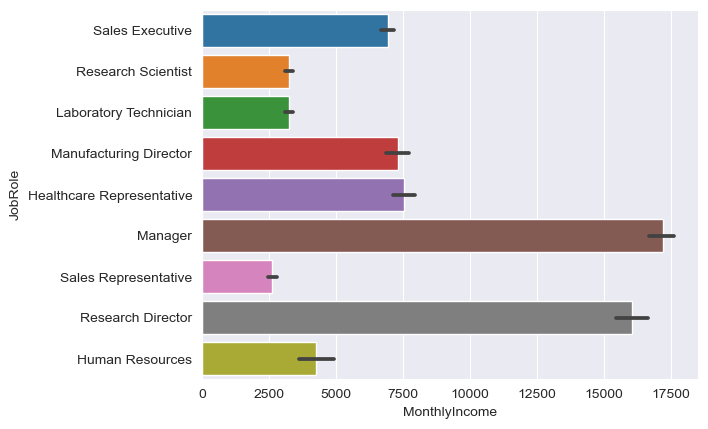

In [73]:
sns.barplot(x='MonthlyIncome',y='JobRole',data=df)

In [74]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [75]:
#job satisfaction
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

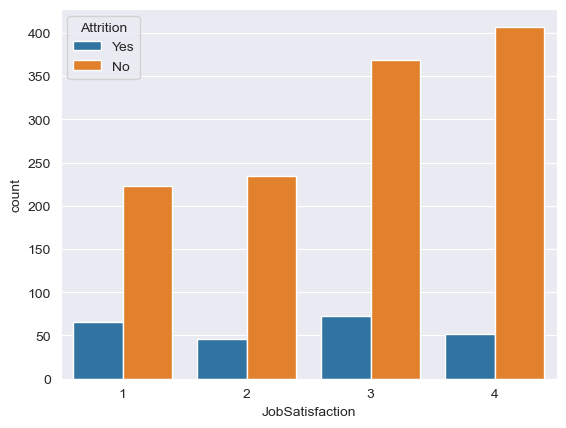

In [76]:
sns.countplot(x='JobSatisfaction',hue='Attrition', data=df)

In [77]:
# marital status
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<Axes: xlabel='MaritalStatus', ylabel='count'>

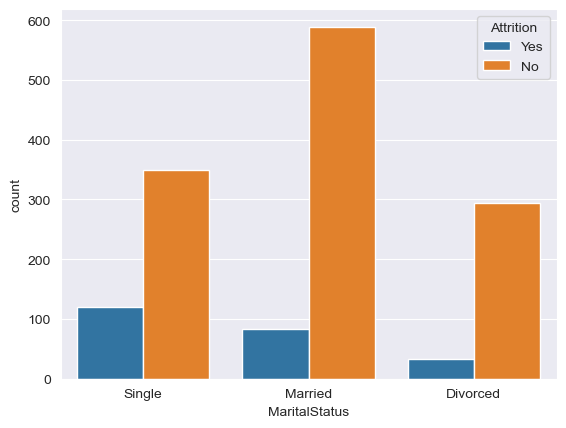

In [78]:
sns.countplot(x='MaritalStatus', hue='Attrition',data=df)

In [79]:
#monthly income
df['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

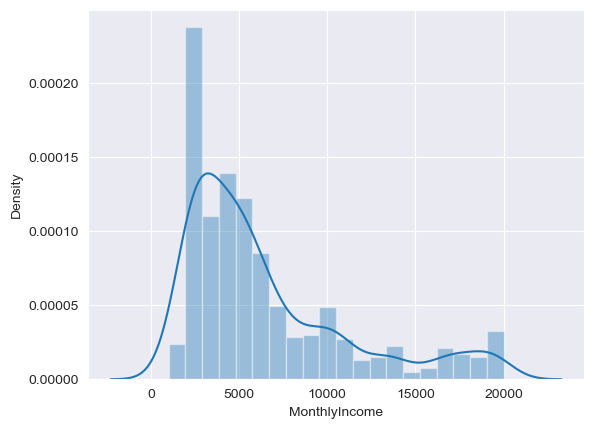

In [80]:
sns.distplot(df['MonthlyIncome'])

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

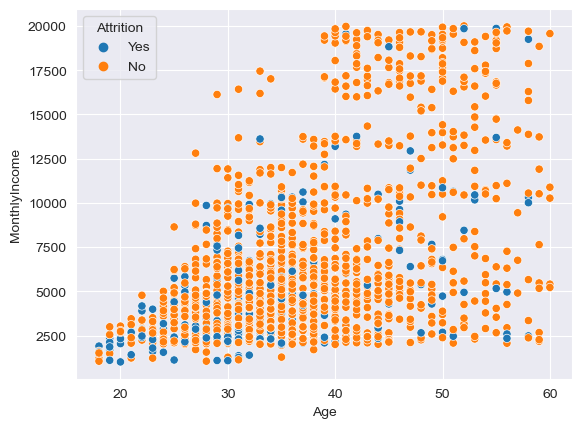

In [81]:
sns.scatterplot(x='Age', y='MonthlyIncome',hue='Attrition', data=df)

<Axes: xlabel='MonthlyRate', ylabel='Density'>

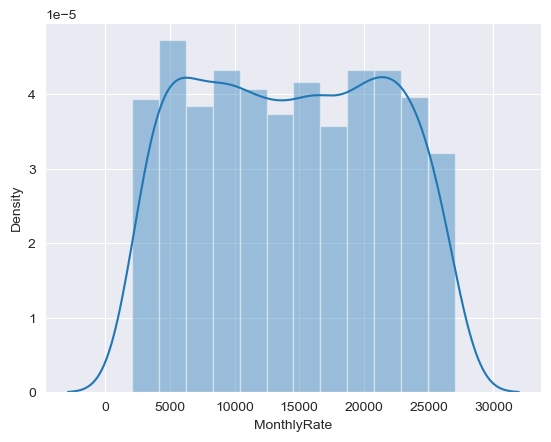

In [82]:
#MonthlyRate
sns.distplot(df['MonthlyRate'])

In [85]:
#num companies
df['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

<Axes: xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

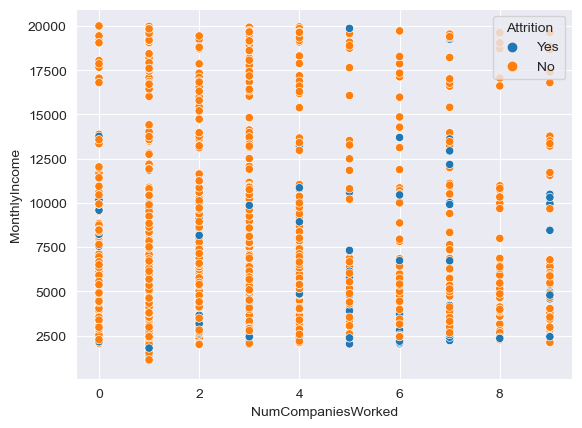

In [86]:
sns.scatterplot(x='NumCompaniesWorked',y='MonthlyIncome',hue='Attrition', data=df)

<Axes: xlabel='NumCompaniesWorked', ylabel='Density'>

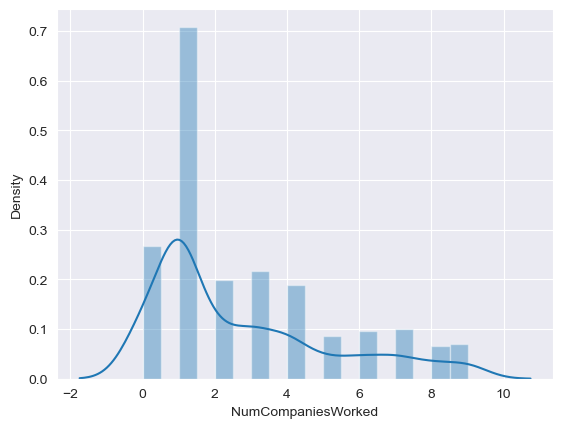

In [87]:
sns.distplot(df['NumCompaniesWorked'])

In [88]:
#over 18
df['Over18'].unique()

array(['Y'], dtype=object)

In [89]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [90]:
#PercentSalaryHike
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

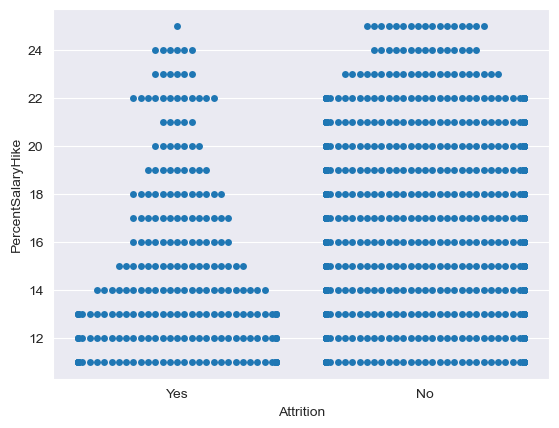

In [91]:
sns.swarmplot(data = df, x='Attrition', y='PercentSalaryHike')

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

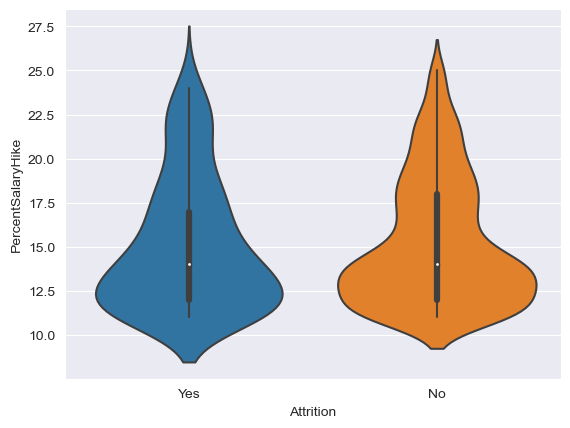

In [94]:
sns.violinplot(data = df, x='Attrition', y='PercentSalaryHike')

In [95]:
#PerformanceRating
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [96]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<Axes: xlabel='PerformanceRating', ylabel='count'>

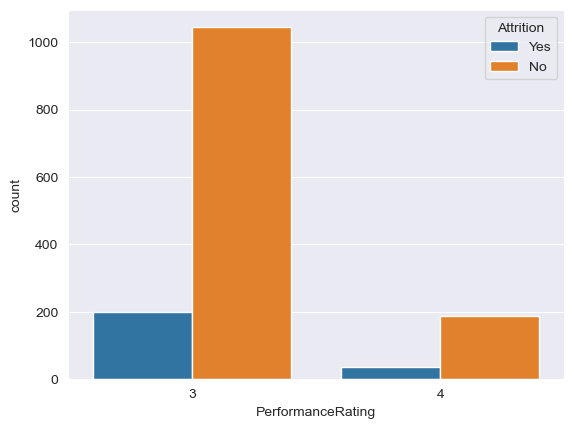

In [97]:
sns.countplot(x='PerformanceRating',hue='Attrition', data=df)

In [98]:
#RelationshipSatisfaction
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [99]:
df.groupby('RelationshipSatisfaction')['Attrition'].value_counts()

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64

In [100]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [101]:
#Standard Hours
df['StandardHours'].unique()

array([80], dtype=int64)

In [102]:
df['StandardHours'].nunique()

1

In [103]:
#Stock option level
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [104]:
#Total working year
df['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

<Axes: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

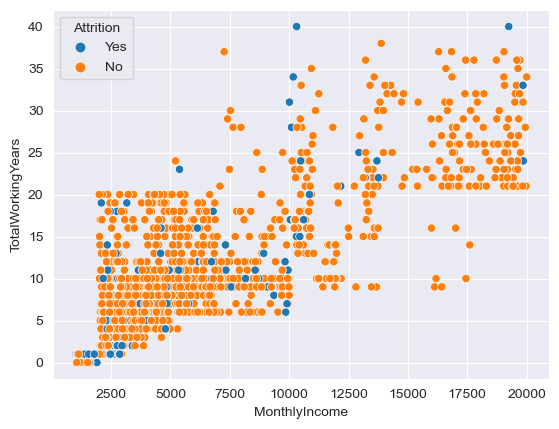

In [105]:
sns.scatterplot(x='MonthlyIncome',y='TotalWorkingYears', hue='Attrition', data=df)

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

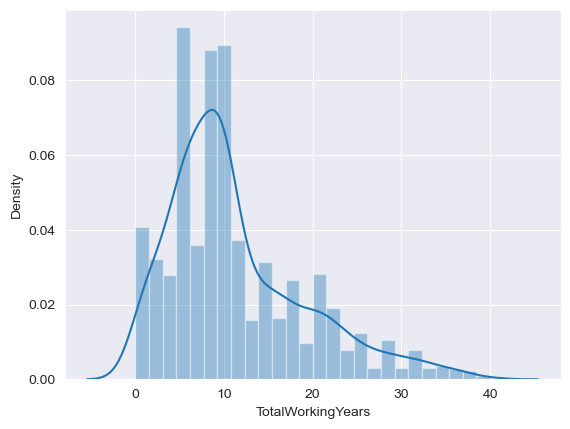

In [106]:
sns.distplot(df['TotalWorkingYears'])

In [107]:
df['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [108]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [109]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts()

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64

In [110]:
df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

<Axes: xlabel='Age', ylabel='YearsAtCompany'>

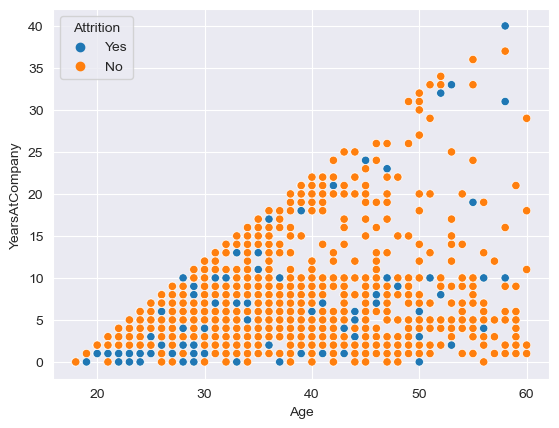

In [111]:
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)

In [112]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [113]:
df['Attrition'].nunique()

2

In [114]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [115]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [116]:
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

In [117]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [118]:
df.shape

(1470, 35)

In [119]:
a=df.drop('Attrition', axis=1)
b=df['Attrition']

In [120]:
a.shape , b.shape

((1470, 34), (1470,))

In [ ]:
a.shape , b.shape

In [122]:
df=pd.concat([a,b], axis=1)

In [123]:
df.shape

(1470, 35)

In [ ]:
sns.pairplot(df)

<Axes: >

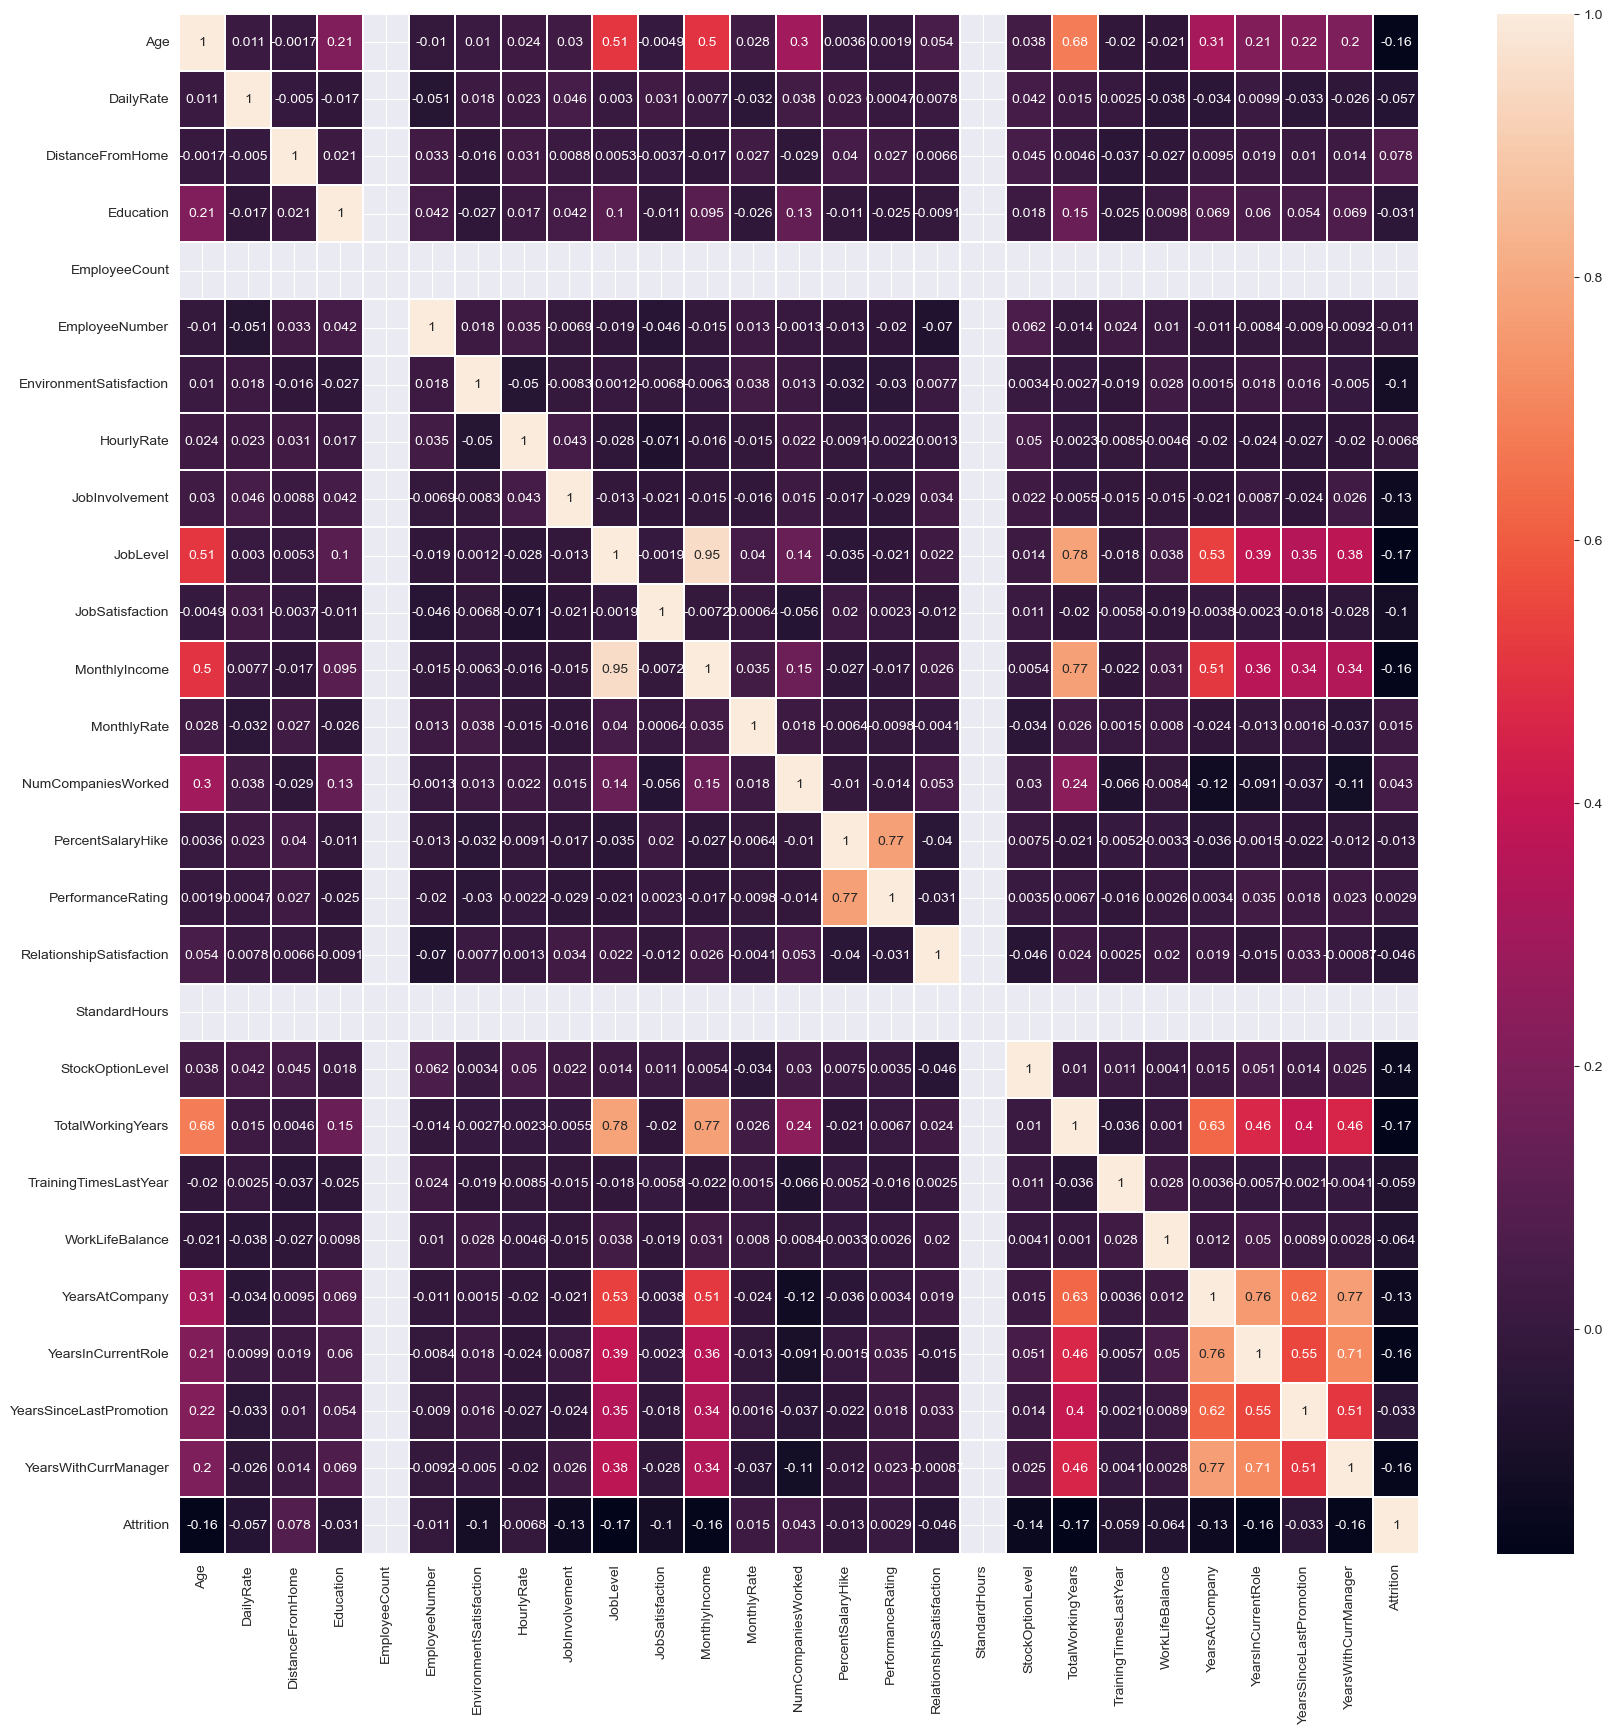

In [125]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

In [128]:
#vif
num=df.select_dtypes(np.number)

In [ ]:
num.drop('Attrition',axis=1, inplace=True)

In [ ]:
num.columns

In [ ]:
standard=pd.DataFrame(standard, columns=num.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [ ]:
VIF

In [ ]:
num.shape

In [ ]:
standard.drop(['EmployeeCount','EmployeeNumber','StandardHours','JobLevel'], axis=1, inplace=True)

In [ ]:
standard.shape

In [ ]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [ ]:
VIF

In [ ]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','JobLevel','Over18'], axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

In [ ]:
df.skew()

In [ ]:
num= df.select_dtypes(np.number)

In [ ]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df['MonthlyIncome'].unique()

In [ ]:
df['MonthlyIncome'].describe()

In [ ]:
df['NumCompaniesWorked'].describe()

In [ ]:
df[df['NumCompaniesWorked']==9]

In [ ]:
df['PercentSalaryHike'].unique()

In [ ]:
df['PercentSalaryHike'].describe()

In [ ]:
df['PerformanceRating'].unique()

In [ ]:
df['StockOptionLevel'].unique()

In [ ]:
df['TotalWorkingYears'].unique()

In [ ]:
df['TotalWorkingYears'].max()

In [ ]:
df[df['TotalWorkingYears']==40]

In [ ]:
df['TrainingTimesLastYear'].unique()

In [ ]:
df['TrainingTimesLastYear'].describe()

In [ ]:
df['YearsAtCompany'].unique()

In [ ]:
df['YearsAtCompany'].max()

In [ ]:
df[df['YearsAtCompany']==40]

In [ ]:
df['YearsInCurrentRole'].unique()

In [ ]:
df['YearsInCurrentRole'].describe()

In [ ]:
sns.distplot(df['YearsInCurrentRole'])

In [ ]:
df.columns

In [ ]:
#Handle categorical features
df.select_dtypes('O')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df['Attrition'].value_counts()

In [ ]:
df.head()

In [ ]:
X= df.drop('Attrition', axis=1)
Y=df['Attrition']

In [ ]:
X.shape , Y.shape

In [ ]:
#Balancing Data

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.shape

In [ ]:
X

In [ ]:
X.skew()

In [ ]:
from sklearn.preprocessing import power_transform
transformed=power_transform(X)

In [ ]:
pd.DataFrame(transformed).skew()

In [ ]:
#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
scaled=sc.fit_transform(transformed)

In [ ]:
X= scaled

In [ ]:
#Balancing
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [ ]:
x,y=sm.fit_resample(X,Y)

In [ ]:
x.shape , y.shape

In [ ]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

In [ ]:
# Select Random State 26
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=197,test_size=.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [ ]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

In [ ]:
#CrossValidation
from sklearn.model_selection import cross_val_score

In [ ]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

In [ ]:
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

In [ ]:
AUC = 99%, very good

In [ ]:
#Model Accuracy is 93.9% and AUC is 99%

In [ ]:
#Saving the Model

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"HR_Analytics.pkl")
['HR_Analytics.pkl']